In [1]:
import pandas as pd

data = pd.read_pickle('/root/blocksnet/tests/data/data_with_geo_info.pickle').fillna(0)

# Social Indicators Prediction

## Predicting using quantile regression

In [2]:
from blocksnet.machine_learning.regression import SocialRegressor

ir = SocialRegressor(n_estimators=100, max_depth=4, min_samples_split=5)

/root/blocksnet/.venv/lib/python3.12/site-packages/torch_geometric/typing.py:68: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: libcudart.so.11.0: cannot open shared object file: No such file or directory
  warnings.warn(f"An issue occurred while importing 'pyg-lib'. "
/root/blocksnet/.venv/lib/python3.12/site-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: libcudart.so.11.0: cannot open shared object file: No such file or directory
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


{'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 5}


Getting data divided into a training and a test sample

In [3]:
X_train, X_test, y_train, y_test = ir.get_train_data(data, scale_data=False)

Train model

In [5]:
ir.train(X_train, y_train, confidence_level=95.0)

## Model Validation

In [ ]:
y_pred = ir.evaluate(X_test)
y_pred = pd.DataFrame(y_pred, columns=y_test.columns.values)

Showing predictions

In [13]:
pred_df, pi_df = ir.predict_with_intervals(X_test, inverse_transform=False)
stats_df = ir.calculate_interval_stats(pred_df, pi_df, y_test)
pred_df

,number_of_nursing_homes,number_of_hotels,number_of_theaters,number_of_cinemas,number_of_secondary_vocational_education_institutions,number_of_higher_education_institutions,number_of_stadiums,number_of_emergency_medical_service_stations,number_of_preschool_educational_institutions,number_of_hostels,...,number_of_post_offices,number_of_swimming_pools,number_of_libraries,number_of_tourist_bases,number_of_fire_safety_facilities,number_of_catering_facilities,number_of_police_stations,number_of_museums,number_of_bank_branches,number_of_flat_sports_facilities
14296,0.014,-0.001,0.002,0.016,0.039,0.479,0.105,0.006,0.297,0.011,...,0.073,0.020,0.040,0.034,0.033,0.093,0.038,0.029,0.065,0.988
3310,0.013,0.804,0.082,0.203,1.084,0.138,1.111,0.230,5.923,0.071,...,0.303,0.109,0.363,0.212,0.723,1.205,0.836,0.587,0.490,17.555
16148,0.249,13.240,0.481,1.551,3.687,1.599,2.781,0.268,23.174,0.916,...,1.558,13.684,1.686,0.225,1.782,15.103,2.446,1.885,1.572,84.766
17455,-0.003,0.010,-0.004,0.006,0.020,0.002,0.086,-0.000,0.384,-0.002,...,0.145,0.031,0.019,0.172,0.001,0.122,0.095,0.026,0.004,0.626
16291,0.013,0.088,0.003,0.020,0.035,0.024,0.250,0.008,0.771,0.012,...,0.444,0.006,0.135,0.156,0.168,0.179,0.075,0.083,0.012,1.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.012,0.166,0.022,0.014,0.007,0.041,0.002,0.063,0.720,0.029,...,0.915,0.076,1.465,0.012,0.355,0.884,0.123,0.087,0.093,1.888
15907,-0.003,0.073,0.002,0.005,0.018,0.002,0.053,-0.000,0.288,0.006,...,0.250,0.028,0.021,0.170,0.042,0.132,0.009,0.021,0.000,0.246
3222,0.075,2.277,1.749,0.474,5.802,3.036,4.222,0.518,46.448,-0.117,...,3.030,3.403,1.047,1.638,2.487,7.802,3.382,1.221,3.787,76.015
17201,-0.003,-0.014,0.002,0.003,0.016,0.004,0.003,-0.000,0.194,-0.003,...,0.041,-0.005,0.028,0.066,0.020,0.060,0.006,0.008,0.000,0.238


Showing prediction intervals

In [14]:
pi_df

,number_of_nursing_homes,number_of_hotels,number_of_theaters,number_of_cinemas,number_of_secondary_vocational_education_institutions,number_of_higher_education_institutions,number_of_stadiums,number_of_emergency_medical_service_stations,number_of_preschool_educational_institutions,number_of_hostels,...,number_of_post_offices,number_of_swimming_pools,number_of_libraries,number_of_tourist_bases,number_of_fire_safety_facilities,number_of_catering_facilities,number_of_police_stations,number_of_museums,number_of_bank_branches,number_of_flat_sports_facilities
14296,"[0.0000, 0.8003]","[0.0000, 1.0003]","[0.0000, 0.0001]","[0.0000, 0.0000]","[0.0000, 0.1587]","[0.0000, 0.0002]","[0.0000, 1.0002]","[0.0000, 0.0000]","[0.0000, 1.9959]","[0.0000, 0.0000]",...,"[0.0000, 1.8338]","[0.0000, 0.0001]","[0.0000, 0.9498]","[0.0000, 0.1067]","[0.0000, 1.0001]","[0.0000, 1.0008]","[0.0000, 0.1342]","[0.0000, 0.3557]","[0.0000, 1.0001]","[0.0000, 2.6549]"
3310,"[0.0000, 0.8003]","[0.0000, 6.3218]","[0.0000, 0.9341]","[0.0000, 1.1000]","[0.0000, 3.6837]","[0.0000, 2.2147]","[0.0000, 4.4003]","[0.0000, 1.0645]","[0.0000, 14.2637]","[0.0000, 1.0000]",...,"[0.0000, 1.8398]","[0.0000, 1.0000]","[0.0000, 1.7614]","[0.0000, 1.7224]","[0.0000, 2.8080]","[0.0000, 8.3346]","[0.0000, 3.9683]","[0.0000, 4.0910]","[0.0000, 2.5993]","[0.0000, 38.6521]"
16148,"[0.0000, 1.2003]","[0.0000, 49.7968]","[0.0000, 2.1526]","[0.0000, 2.4603]","[0.0000, 6.5603]","[0.0000, 4.6287]","[0.0000, 6.0237]","[0.0000, 1.7290]","[0.0000, 36.5714]","[0.0000, 2.7044]",...,"[0.0000, 2.4977]","[0.0000, 81.8051]","[0.0000, 3.0518]","[0.0000, 11.9556]","[0.0000, 4.2809]","[0.0000, 22.6673]","[0.0000, 5.6534]","[0.0000, 4.2266]","[0.0000, 2.6977]","[0.0000, 103.6127]"
17455,"[0.0000, 0.0000]","[0.0000, 1.0003]","[0.0000, 0.0001]","[0.0000, 0.0000]","[0.0000, 0.0003]","[0.0000, 0.0002]","[0.0000, 1.8217]","[0.0000, 0.0000]","[0.0000, 1.0117]","[0.0000, 0.0000]",...,"[0.0000, 1.5239]","[0.0000, 0.0001]","[0.0000, 0.8777]","[0.0000, 1.3351]","[0.0000, 1.0001]","[0.0000, 1.0008]","[0.0000, 0.4367]","[0.0000, 0.2976]","[0.0000, 1.0001]","[0.0000, 2.1183]"
16291,"[0.0000, 0.8003]","[0.0000, 1.6694]","[0.0000, 0.4596]","[0.0000, 0.0000]","[0.0000, 1.1004]","[0.0000, 0.0002]","[0.0000, 1.9024]","[0.0000, 0.0000]","[0.0000, 3.4154]","[0.0000, 0.0000]",...,"[0.0000, 1.7800]","[0.0000, 1.0000]","[0.0000, 1.1141]","[0.0000, 2.0990]","[0.0000, 1.6693]","[0.0000, 2.0000]","[0.0000, 1.6478]","[0.0000, 1.3954]","[0.0000, 1.0001]","[0.0000, 6.6494]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,"[0.0000, 0.9003]","[0.0000, 3.3751]","[0.0000, 0.4184]","[0.0000, 0.0000]","[0.0000, 1.0459]","[0.0000, 0.4475]","[0.0000, 1.1035]","[0.0000, 0.0000]","[0.0000, 2.9995]","[0.0000, 0.0000]",...,"[0.0000, 2.8937]","[0.0000, 1.0000]","[0.0000, 2.7277]","[0.0000, 2.8210]","[0.0000, 1.0001]","[0.0000, 2.5659]","[0.0000, 0.9993]","[0.0000, 1.6686]","[0.0000, 1.0001]","[0.0000, 8.9607]"
15907,"[0.0000, 0.0000]","[0.0000, 1.0003]","[0.0000, 0.0001]","[0.0000, 0.0000]","[0.0000, 0.0003]","[0.0000, 0.0002]","[0.0000, 1.0002]","[0.0000, 0.0000]","[0.0000, 1.9959]","[0.0000, 0.0000]",...,"[0.0000, 1.0002]","[0.0000, 0.0001]","[0.0000, 0.9137]","[0.0000, 1.5823]","[0.0000, 1.0001]","[0.0000, 1.0008]","[0.0000, 0.4336]","[0.0000, 0.3155]","[0.0000, 1.0001]","[0.0000, 2.3494]"
3222,"[0.0000, 1.3000]","[0.0000, 9.7851]","[0.0000, 3.4093]","[0.0000, 1.9493]","[0.0000, 8.7879]","[0.0000, 12.8907]","[0.0000, 8.9159]","[0.0000, 1.5457]","[0.0000, 49.2752]","[0.0000, 3.1063]",...,"[0.0000, 5.4669]","[0.0000, 10.1439]","[0.0000, 5.4087]","[0.0000, 6.3567]","[0.0000, 9.2852]","[0.0000, 32.1112]","[0.0000, 6.1708]","[0.0000, 10.0183]","[0.0000, 11.4037]","[0.0000, 116.3587]"
17201,"[0.0000, 0.0000]","[0.0000, 1.0003]","[0.0000, 0.0001]","[0.0000, 0.0000]","[0.0000, 0.0003]","[0.0000, 0.0002]","[0.0000, 1.0002]","[0.0000, 0.0000]","[0.0000, 1.0117]","[0.0000, 0.0000]",...,"[0.0000, 1.0002]",

Showing validation statistics

In [15]:
stats_df

y,coverage_percentage,mean_interval_width,mse,rmse,mae,r2
number_of_nursing_homes,99.474,0.421,0.024,0.155,0.046,-0.273
number_of_hotels,97.368,3.772,26.112,5.110,1.009,0.277
number_of_theaters,96.842,0.548,0.359,0.599,0.170,0.365
number_of_cinemas,98.070,0.438,0.102,0.320,0.109,0.146
number_of_secondary_vocational_education_institutions,96.491,1.577,1.027,1.013,0.379,0.678
number_of_higher_education_institutions,96.491,1.206,4.898,2.213,0.494,0.370
number_of_stadiums,97.193,2.361,1.097,1.047,0.504,0.576
number_of_emergency_medical_service_stations,97.895,0.232,0.102,0.320,0.097,0.362
number_of_preschool_educational_institutions,96.316,8.175,26.301,5.128,1.679,0.828
number_of_hostels,97.895,0.457,2.268,1.506,0.253,-1.489


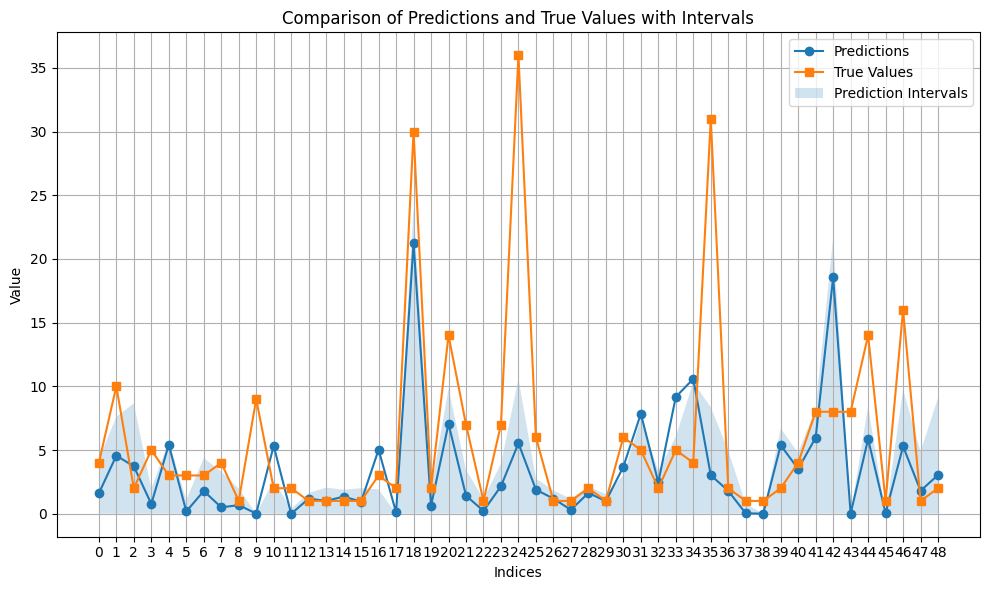

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

target_name = 'number_of_higher_education_institutions'


mask = y_test[target_name].values > 0
filtered_pred_df = pred_df[mask]
filtered_pi_df = pi_df[mask]
filtered_y_true = y_test[mask]

# Parameters for slicing (default is full filtered range)
start_idx = 0  # Starting index (can be changed)
end_idx = 50   # Ending index (can be changed)

# Extract data from filtered DataFrames with slicing
x = np.linspace(0, len(filtered_pred_df) - 1, len(filtered_pred_df))[start_idx:end_idx + 1]
y_pred = filtered_pred_df[target_name].values[start_idx:end_idx + 1]
y_true = filtered_y_true[target_name].values[start_idx:end_idx + 1]

# Extract and convert intervals from pi_df
pi_data = filtered_pi_df[target_name].values[start_idx:end_idx + 1]
lower_bound = [float(s.strip('[]').split(',')[0]) for s in pi_data]  # Extract lower bound
upper_bound = [float(s.strip('[]').split(',')[1]) for s in pi_data]  # Extract upper bound

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_pred, label='Predictions', marker='o')
plt.plot(x, y_true, label='True Values', marker='s')
plt.fill_between(x, lower_bound, upper_bound, alpha=0.2, label='Prediction Intervals')

# Configure the plot
plt.xlabel('Indices')
plt.ylabel('Value')
plt.title('Comparison of Predictions and True Values with Intervals')
plt.legend()
plt.grid(True)
plt.xticks(x)
plt.tight_layout()

## Error for different targets

[]

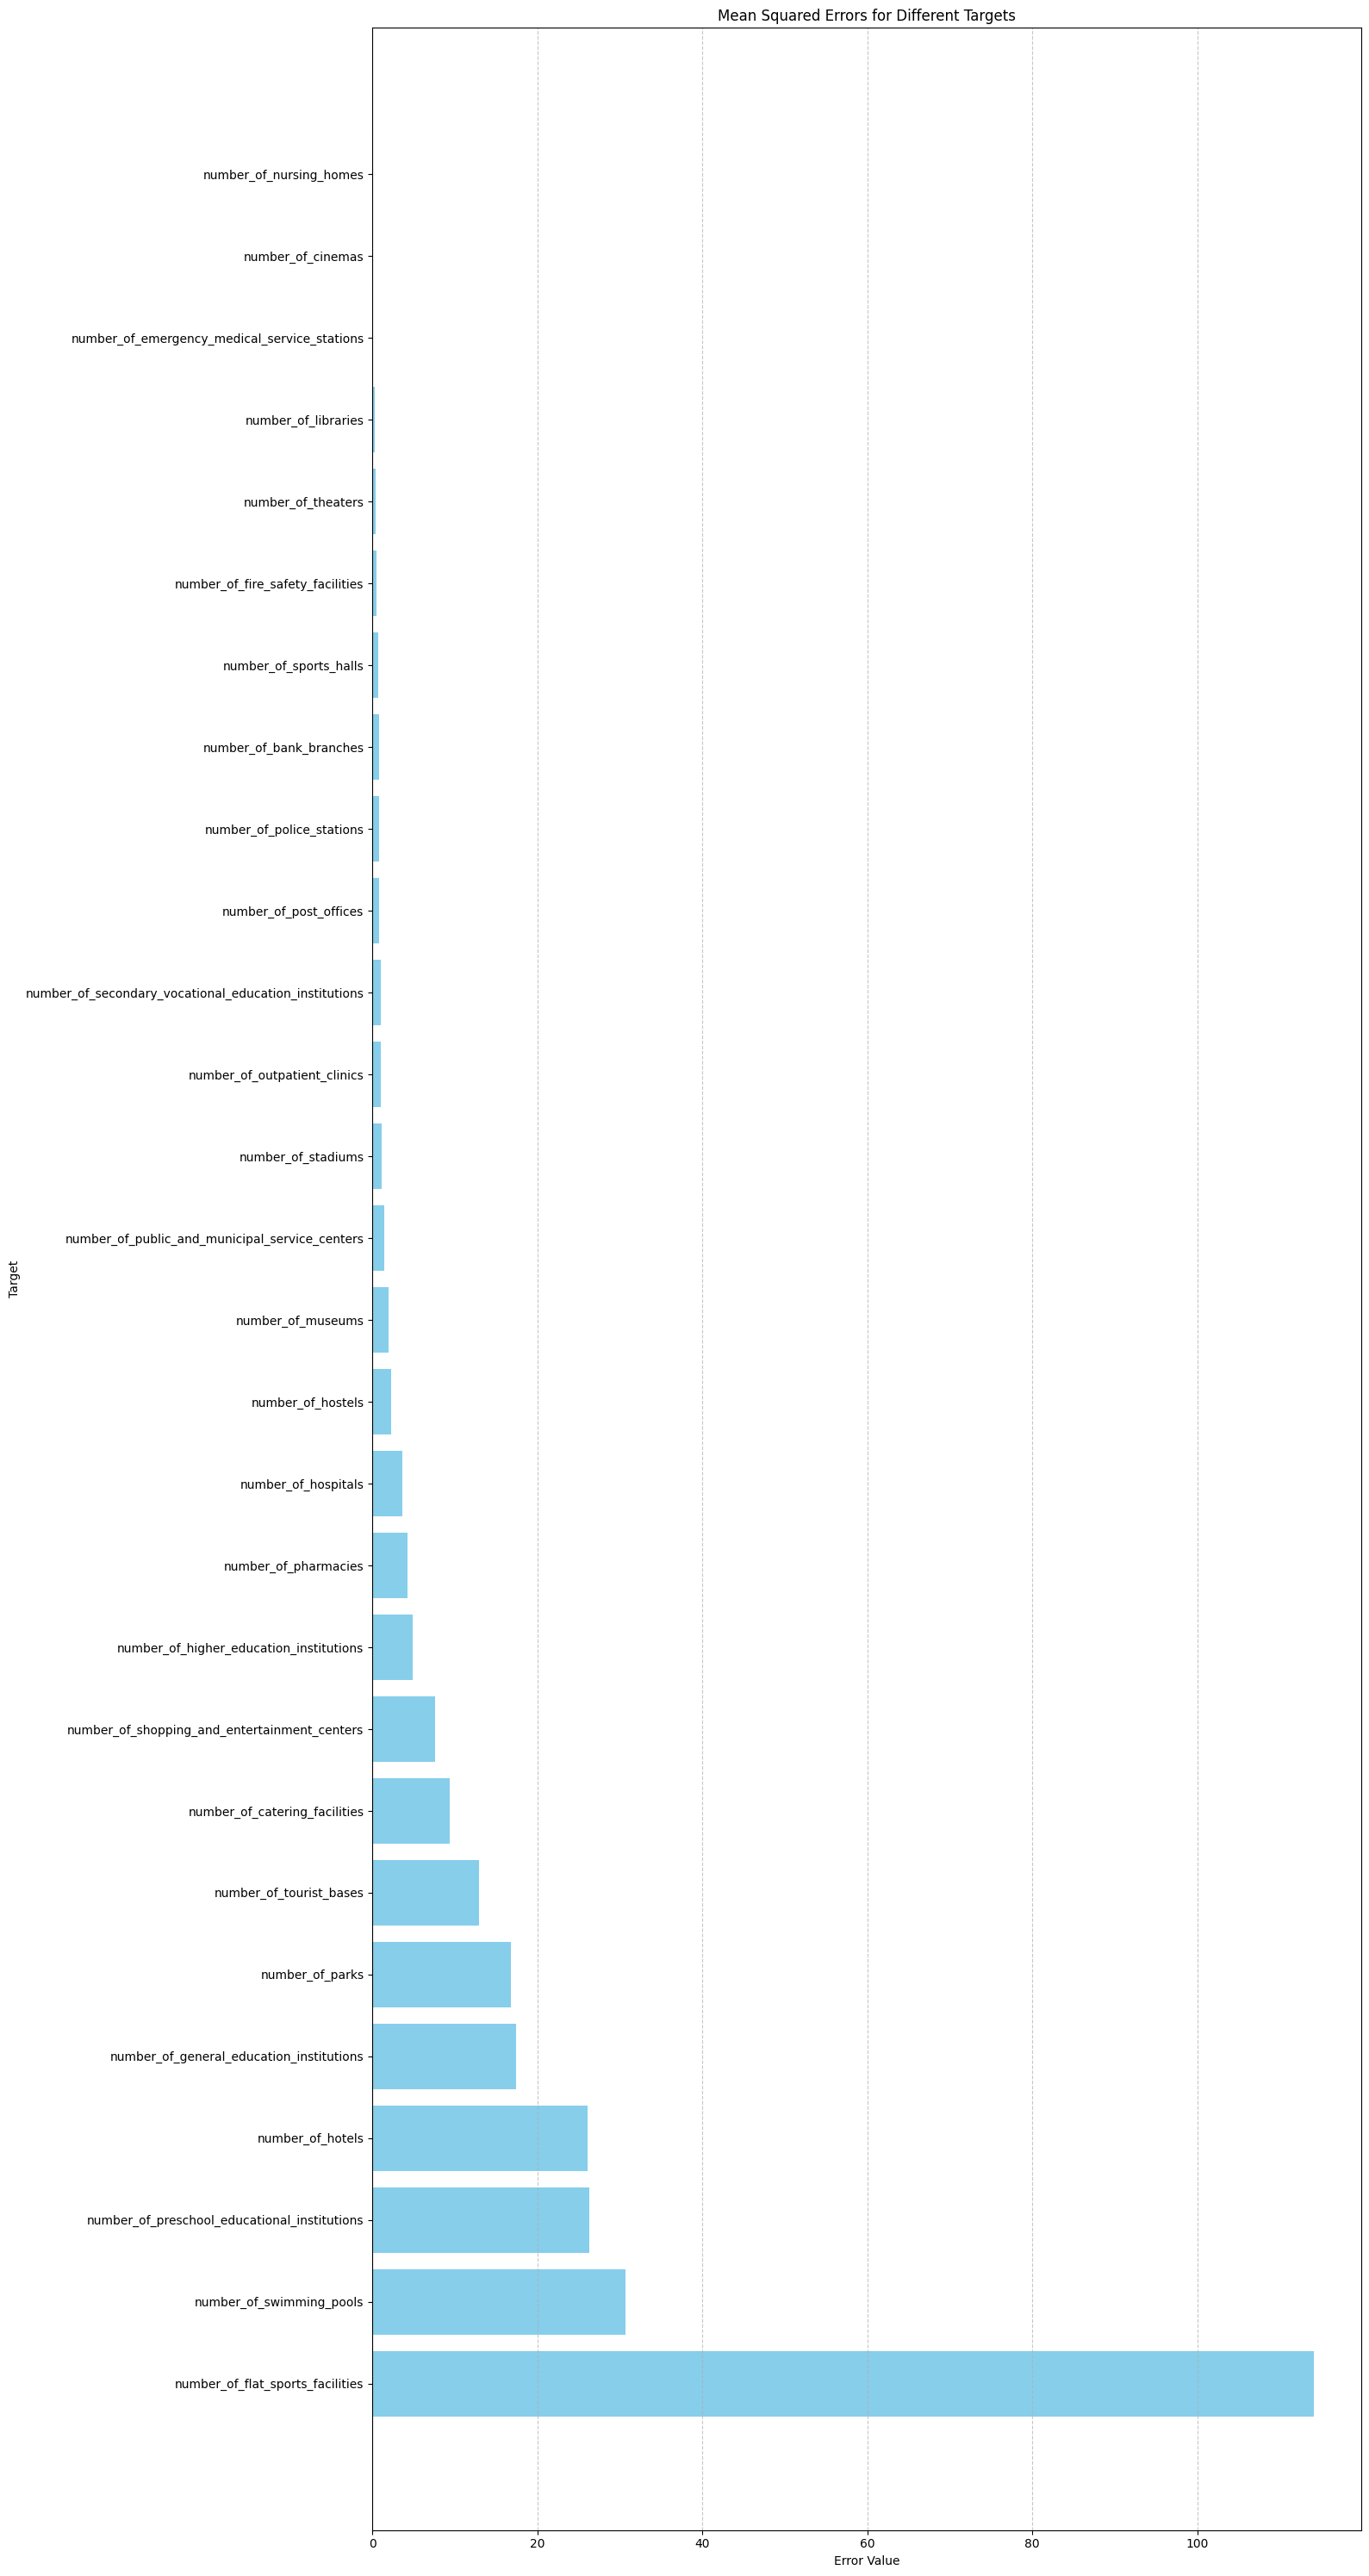

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming stats_df is obtained from calculate_interval_stats and has been transposed
# Example: pred_df, pi_df = ir.predict_with_intervals(X_test, inverse_transform=False)
# stats_df = ir.calculate_interval_stats(pred_df, pi_df, y_test).T

# Extract MSE values and target names from transposed stats_df
mse = stats_df['mse'].values
target_names = stats_df.index

# Sort by descending MSE
sorted_indices = np.argsort(mse)[::-1]
sorted_mse = mse[sorted_indices]
sorted_targets = target_names[sorted_indices]

# Create horizontal bar plot
plt.figure(figsize=(16, 30))
plt.barh(sorted_targets, sorted_mse, color='skyblue')

# Add labels and title
plt.ylabel('Target')
plt.xlabel('Error Value')
plt.title('Mean Squared Errors for Different Targets')

# Add grid and save plot
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.plot()

## LIME Prediction

Mean Squared Error: 4.898
Predicted value: 0.479
Real value: 0.0
Explanation:
[('business > 15183.04', 2.9534802613554785), ('population <= 1136.00', -0.5860909439229887), ('transport <= 0.00', 0.3809469174382578), ('74914.77 < industrial <= 528208.61', -0.2871944980298722), ('buildings_count <= 4.00', -0.23936306374227934), ('area <= 63000.00', -0.1874804409055796), ('34922.80 < special <= 156359.65', -0.1421858470028649), ('footprint_area <= 0.00', -0.12259403792263908), ('longitude <= -883053.12', 0.12092895926078623), ('444312.69 < recreation <= 4056059.51', 0.10099483719723343)]


[]

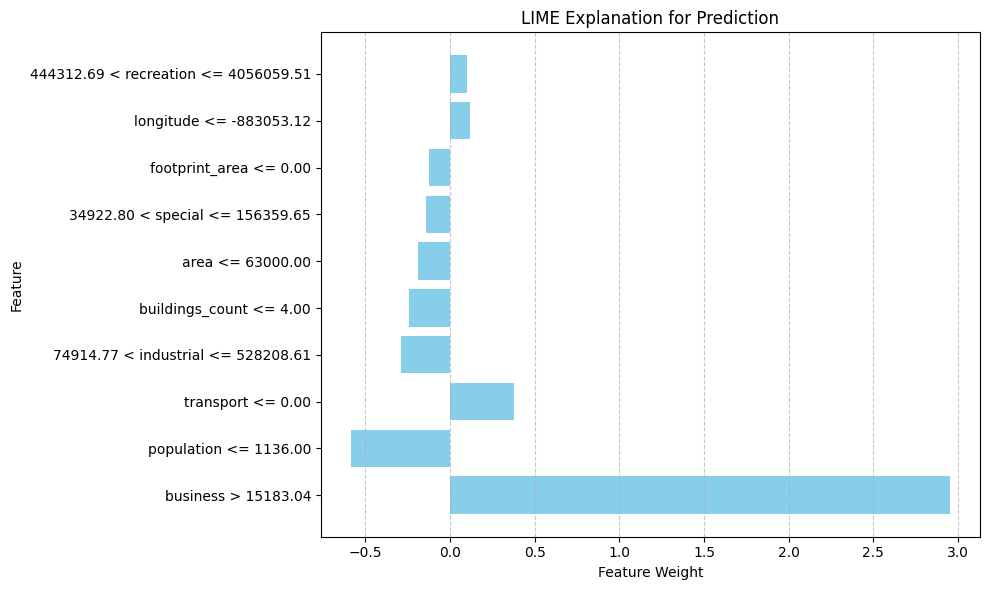

In [22]:
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Target column
column = 'number_of_higher_education_institutions'

# Fill missing values in y_train
y_train = y_train.fillna(0)

# Use ir model for predictions
pred_df, pi_df = ir.predict_with_intervals(X_test, inverse_transform=False)

# Get MSE from stats_df (assuming stats_df is transposed)
stats_df = ir.calculate_interval_stats(pred_df, pi_df, y_test)
mse = stats_df.loc[column, 'mse']

# Print MSE
print(f'Mean Squared Error: {mse:.3f}')

# Helper function for LIME to predict with ir model for the specific column
def predict_fn(X):
    # Convert input to DataFrame with correct column names
    X_df = pd.DataFrame(X, columns=X_train.columns)
    # Get predictions from ir model
    pred_df, _ = ir.predict_with_intervals(X_df, inverse_transform=False)
    # Return predictions for the specific column
    return pred_df[column].values

# Create LIME explainer for tabular data
explainer = LimeTabularExplainer(
    training_data=X_train.values,  # Convert DataFrame to numpy array
    feature_names=X_train.columns,  # Feature names
    class_names=[column],  # Target name for regression
    mode='regression',  # Task type: regression
    random_state=42
)

# Select one instance for interpretation (e.g., first from test set)
i = 0
instance = X_test.iloc[i].values.reshape(1, -1)

# Get explanation for the selected instance
explanation = explainer.explain_instance(instance[0], predict_fn)

# Print prediction and real value
print("Predicted value:", pred_df[column].iloc[i])
print("Real value:", y_test[column].iloc[i])
print("Explanation:")
print(explanation.as_list())

# Get explanation as a list
explanation_list = explanation.as_list()

# Split explanation into features and weights
features, weights = zip(*explanation_list)

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(features, weights, color='skyblue')

# Add labels and title
plt.xlabel("Feature Weight")
plt.ylabel("Feature")
plt.title("LIME Explanation for Prediction")

# Add grid and save plot
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.plot()